In [ ]:


import pandas as pd
from textblob import TextBlob
import re
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report

# Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')

# Load your Twitter dataset (replace 'your_dataset.csv' with your file path)
file_path = '/content/drive/MyDrive/Colab Notebooks/Gangs_of_Lagos.csv'
df = pd.read_csv(file_path)

# Display the first few rows of the dataset
print("Original Dataset:")
print(df.head())

# Clean up the text data
def clean_text(tweet):
    # Remove special characters, links, and usernames
    tweet = re.sub(r'@[A-Za-z0-9]+', '', tweet)  # Remove usernames
    tweet = re.sub('https?://[A-Za-z0-9./]+', '', tweet)  # Remove links
    tweet = re.sub('[^a-zA-Z]', ' ', tweet)  # Keep only letters

    # Convert to lowercase
    tweet = tweet.lower()

    return tweet

df['cleaned_text'] = df['tweet'].apply(clean_text)

# Perform sentiment analysis using TextBlob
def get_sentiment(tweet):
    analysis = TextBlob(tweet)
    # Classify the polarity of the tweet
    return 'positive' if analysis.sentiment.polarity > 0 else 'negative' if analysis.sentiment.polarity < 0 else 'neutral'

# Create a new column 'sentiment' based on the cleaned text
df['sentiment'] = df['cleaned_text'].apply(get_sentiment)

# Display the cleaned dataset with sentiment analysis results
print("\nCleaned Dataset with Sentiment Analysis:")
print(df[['tweet', 'cleaned_text', 'sentiment']].head())

# Use the correct column name for X
X = df['cleaned_text']
y = df['sentiment']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Vectorize the text data
vectorizer = TfidfVectorizer()
X_train_vec = vectorizer.fit_transform(X_train)
X_test_vec = vectorizer.transform(X_test)

# Define machine learning models
models = {
    'Logistic Regression': LogisticRegression(),
    'Random Forest': RandomForestClassifier(),
    'Naive Bayes': MultinomialNB()
}

# Train and evaluate each model
for model_name, model in models.items():
    # Train the model
    model.fit(X_train_vec, y_train)

    # Predict sentiments
    y_pred = model.predict(X_test_vec)

    # Evaluate F-scores
    f_score = classification_report(y_test, y_pred, target_names=df['sentiment'].unique())
    print(f'\nClassification Report - {model_name}:\n{f_score}')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Original Dataset:
                        date  \
0  2023-04-10 17:03:10+00:00   
1  2023-04-10 17:03:07+00:00   
2  2023-04-10 17:03:05+00:00   
3  2023-04-10 17:01:44+00:00   
4  2023-04-10 17:00:11+00:00   

                                               tweet    username  \
0  Watching Eniola Badmus' role in Gangs of Lagos...     IamLait   
1  @_uchayyyy_ She did not even have to be in Gan...    thefvnta   
2  Awwwwwwwwwn. I got "Ify, the Collector-Protect...  Preshy_ous   
3  A big thank you to @jadeosiberu and all the ca...    Moyo_VIP   
4                            @forlah_ Gangs of Lagos   sixcenti1   

   verification            displayname  \
0         False  'Laitan François jnr.   
1         False           Mr ican doit   
2         False              Nwa Nnu 💜   
3         False          Moyò of Lagos   
4         False                shaheed   

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(



Classification Report - Logistic Regression:
              precision    recall  f1-score   support

    positive       0.90      0.44      0.59       399
     neutral       0.85      0.94      0.89      1312
    negative       0.85      0.89      0.87      1163

    accuracy                           0.85      2874
   macro avg       0.87      0.76      0.78      2874
weighted avg       0.86      0.85      0.84      2874


Classification Report - Random Forest:
              precision    recall  f1-score   support

    positive       0.94      0.20      0.33       399
     neutral       0.82      0.89      0.85      1312
    negative       0.74      0.87      0.80      1163

    accuracy                           0.79      2874
   macro avg       0.83      0.65      0.66      2874
weighted avg       0.80      0.79      0.76      2874


Classification Report - Naive Bayes:
              precision    recall  f1-score   support

    positive       0.86      0.03      0.06       399
     

In [ ]:

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report

# Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')

# Load your Twitter sentiment dataset
# Replace 'your_dataset.csv' with the actual file path of your dataset
file_path = '/content/drive/MyDrive/Colab Notebooks/PeterObi Politics.csv'
df = pd.read_csv(file_path)

# Assuming your dataset has 'text' column for tweets and 'sentiment' column for labels
X = df['clean_tweet']
y = df['sentiment']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Vectorize the text data
vectorizer = TfidfVectorizer()
X_train_vec = vectorizer.fit_transform(X_train)
X_test_vec = vectorizer.transform(X_test)

# Define machine learning models
models = {
    'Logistic Regression': LogisticRegression(),
    'Random Forest': RandomForestClassifier(),
    'Naive Bayes': MultinomialNB()
}

# Train and evaluate each model
for model_name, model in models.items():
    # Train the model
    model.fit(X_train_vec, y_train)

    # Predict sentiments
    y_pred = model.predict(X_test_vec)

    # Evaluate F-scores
    f_score = classification_report(y_test, y_pred, target_names=df['sentiment'].unique())
    print(f'\nClassification Report - {model_name}:\n{f_score}')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).

Classification Report - Logistic Regression:
              precision    recall  f1-score   support

    positive       0.76      0.84      0.80       546
    negative       0.50      0.03      0.06        61
     neutral       0.72      0.72      0.72       393

    accuracy                           0.74      1000
   macro avg       0.66      0.53      0.52      1000
weighted avg       0.73      0.74      0.72      1000


Classification Report - Random Forest:
              precision    recall  f1-score   support

    positive       0.75      0.81      0.78       546
    negative       0.67      0.07      0.12        61
     neutral       0.67      0.68      0.68       393

    accuracy                           0.72      1000
   macro avg       0.69      0.52      0.53      1000
weighted avg       0.71      0.72      0.70      1000


Classification Report 

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report

# Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')

# Load your Twitter sentiment dataset
# Replace 'your_dataset.csv' with the actual file path of your dataset
file_path = '/content/drive/MyDrive/Colab Notebooks/Tweets.csv'
df = pd.read_csv(file_path)

# Drop rows with missing values in 'selected_text' and 'sentiment' columns
df = df.dropna(subset=['selected_text', 'sentiment'])

# Assuming your dataset has 'text' column for tweets and 'sentiment' column for labels
X = df['selected_text']
y = df['sentiment']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Vectorize the text data
vectorizer = TfidfVectorizer()
X_train_vec = vectorizer.fit_transform(X_train.astype('U'))  # Convert to Unicode
X_test_vec = vectorizer.transform(X_test.astype('U'))

# Define machine learning models
models = {
    'Logistic Regression': LogisticRegression(),
    'Random Forest': RandomForestClassifier(),
    'Naive Bayes': MultinomialNB()
}

# Train and evaluate each model
for model_name, model in models.items():
    # Train the model
    model.fit(X_train_vec, y_train)

    # Predict sentiments
    y_pred = model.predict(X_test_vec)

    # Evaluate F-scores
    f_score = classification_report(y_test, y_pred, target_names=df['sentiment'].unique())
    print(f'\nClassification Report - {model_name}:\n{f_score}')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(



Classification Report - Logistic Regression:
              precision    recall  f1-score   support

     neutral       0.81      0.78      0.80      1572
    negative       0.79      0.88      0.83      2236
    positive       0.91      0.80      0.85      1688

    accuracy                           0.83      5496
   macro avg       0.84      0.82      0.83      5496
weighted avg       0.84      0.83      0.83      5496


Classification Report - Random Forest:
              precision    recall  f1-score   support

     neutral       0.79      0.76      0.77      1572
    negative       0.77      0.90      0.83      2236
    positive       0.92      0.76      0.83      1688

    accuracy                           0.81      5496
   macro avg       0.83      0.80      0.81      5496
weighted avg       0.82      0.81      0.81      5496


Classification Report - Naive Bayes:
              precision    recall  f1-score   support

     neutral       0.92      0.58      0.71      1572
    n

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Original Dataset:
                        date  \
0  2023-04-10 17:03:10+00:00   
1  2023-04-10 17:03:07+00:00   
2  2023-04-10 17:03:05+00:00   
3  2023-04-10 17:01:44+00:00   
4  2023-04-10 17:00:11+00:00   

                                               tweet    username  \
0  Watching Eniola Badmus' role in Gangs of Lagos...     IamLait   
1  @_uchayyyy_ She did not even have to be in Gan...    thefvnta   
2  Awwwwwwwwwn. I got "Ify, the Collector-Protect...  Preshy_ous   
3  A big thank you to @jadeosiberu and all the ca...    Moyo_VIP   
4                            @forlah_ Gangs of Lagos   sixcenti1   

   verification            displayname  \
0         False  'Laitan François jnr.   
1         False           Mr ican doit   
2         False              Nwa Nnu 💜   
3         False          Moyò of Lagos   
4         False                shaheed   

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


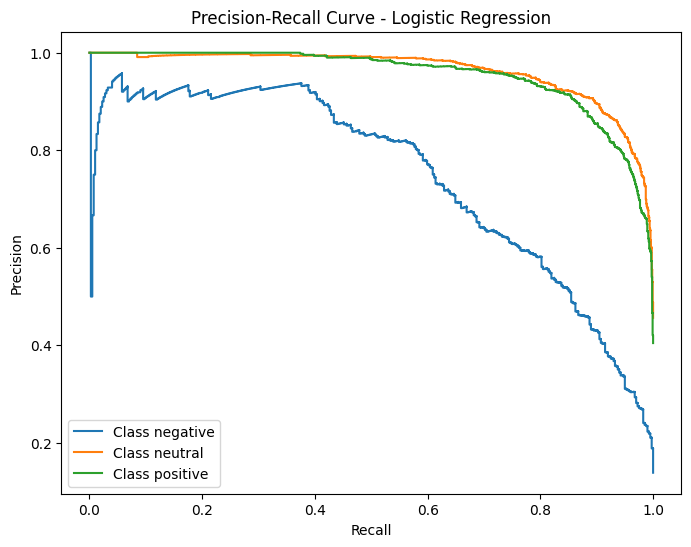

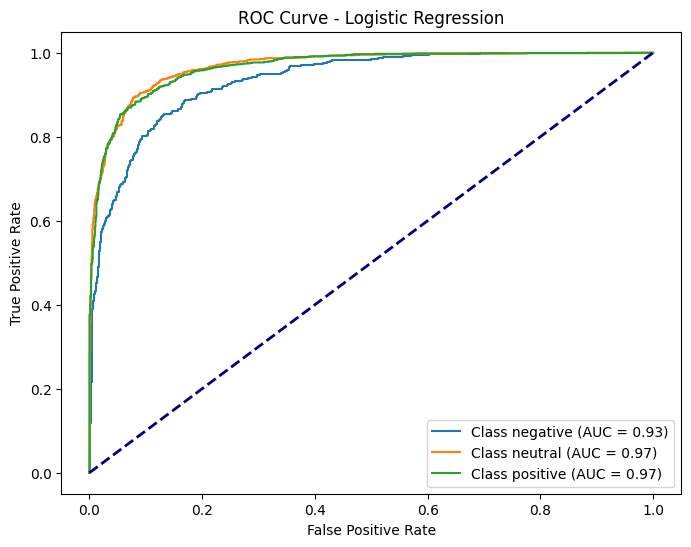

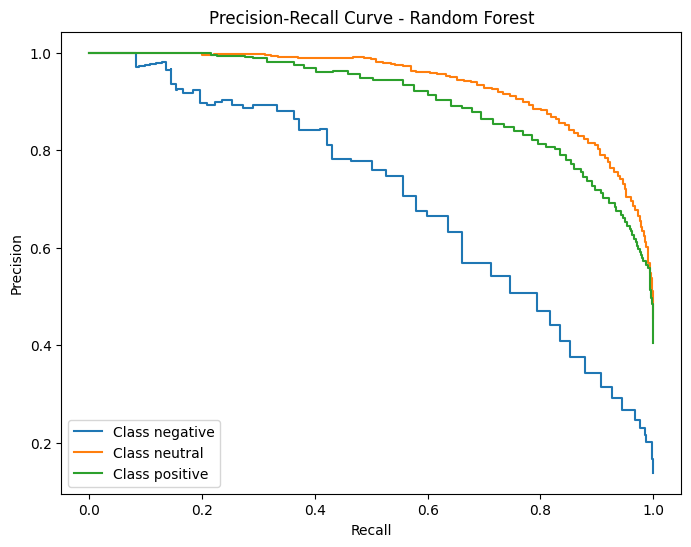

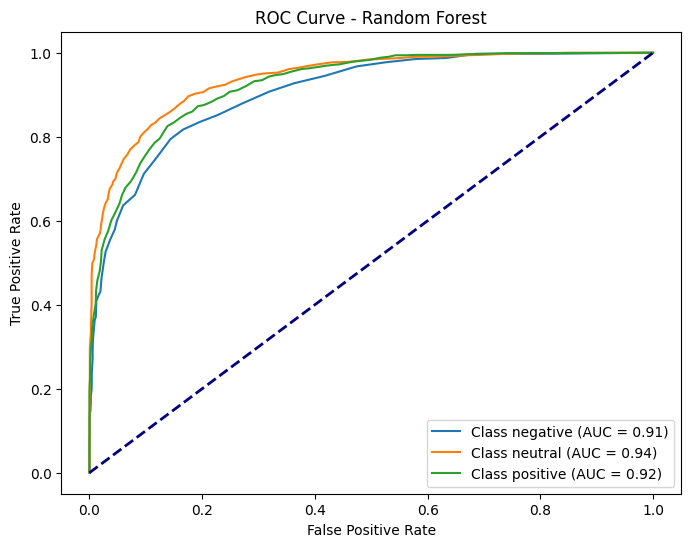

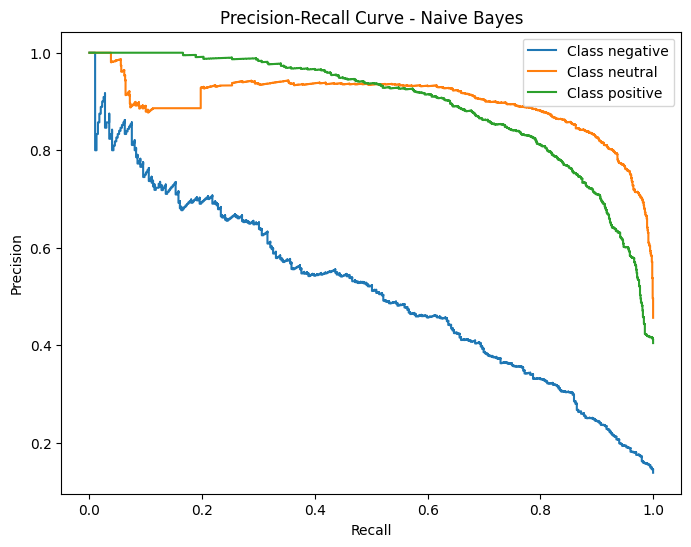

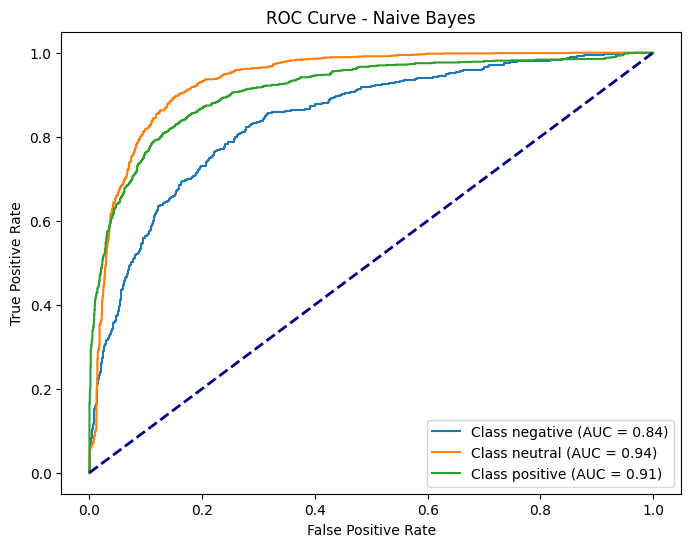

In [ ]:

import pandas as pd
from textblob import TextBlob
import re
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, precision_recall_curve, roc_curve, auc
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import learning_curve

# Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')

# Load your Twitter dataset (replace 'your_dataset.csv' with your file path)
file_path = '/content/drive/MyDrive/Colab Notebooks/Gangs_of_Lagos.csv'
df = pd.read_csv(file_path)

# Display the first few rows of the dataset
print("Original Dataset:")
print(df.head())

# Clean up the text data
def clean_text(tweet):
    # Remove special characters, links, and usernames
    tweet = re.sub(r'@[A-Za-z0-9]+', '', tweet)  # Remove usernames
    tweet = re.sub('https?://[A-Za-z0-9./]+', '', tweet)  # Remove links
    tweet = re.sub('[^a-zA-Z]', ' ', tweet)  # Keep only letters

    # Convert to lowercase
    tweet = tweet.lower()

    return tweet

df['cleaned_text'] = df['tweet'].apply(clean_text)

# Perform sentiment analysis using TextBlob
def get_sentiment(tweet):
    analysis = TextBlob(tweet)
    # Classify the polarity of the tweet
    return 'positive' if analysis.sentiment.polarity > 0 else 'negative' if analysis.sentiment.polarity < 0 else 'neutral'

# Create a new column 'sentiment' based on the cleaned text
df['sentiment'] = df['cleaned_text'].apply(get_sentiment)

# Display the cleaned dataset with sentiment analysis results
print("\nCleaned Dataset with Sentiment Analysis:")
print(df[['tweet', 'cleaned_text', 'sentiment']].head())

# Use the correct column name for X
X = df['cleaned_text']
y = df['sentiment']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Vectorize the text data
vectorizer = TfidfVectorizer()
X_train_vec = vectorizer.fit_transform(X_train)
X_test_vec = vectorizer.transform(X_test)

# Define machine learning models
models = {
    'Logistic Regression': LogisticRegression(),
    'Random Forest': RandomForestClassifier(),
    'Naive Bayes': MultinomialNB()
}

# Plot precision-recall curve and ROC curve for each class
for model_name, model in models.items():
    # Train the model
    model.fit(X_train_vec, y_train)

    # Predict sentiments
    y_pred_prob = model.predict_proba(X_test_vec)

    # Plot precision-recall curve for each class
    plt.figure(figsize=(8, 6))
    for i in range(len(model.classes_)):
        precision, recall, _ = precision_recall_curve(y_test.apply(lambda x: x == model.classes_[i]), y_pred_prob[:, i])
        plt.step(recall, precision, label=f'Class {model.classes_[i]}')

    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.title(f'Precision-Recall Curve - {model_name}')
    plt.legend()
    plt.show()

    # Plot ROC curve for each class
    plt.figure(figsize=(8, 6))
    for i in range(len(model.classes_)):
        fpr, tpr, _ = roc_curve(y_test.apply(lambda x: x == model.classes_[i]), y_pred_prob[:, i])
        roc_auc = auc(fpr, tpr)
        plt.plot(fpr, tpr, label=f'Class {model.classes_[i]} (AUC = {roc_auc:.2f})')

    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'ROC Curve - {model_name}')
    plt.legend()
    plt.show()

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


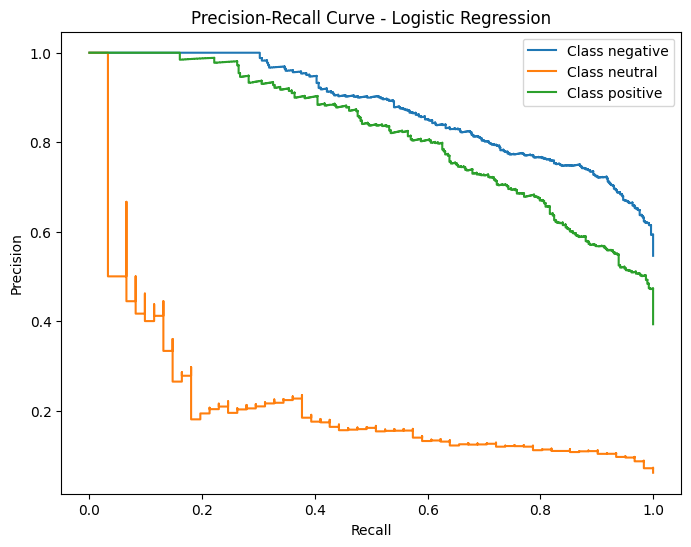

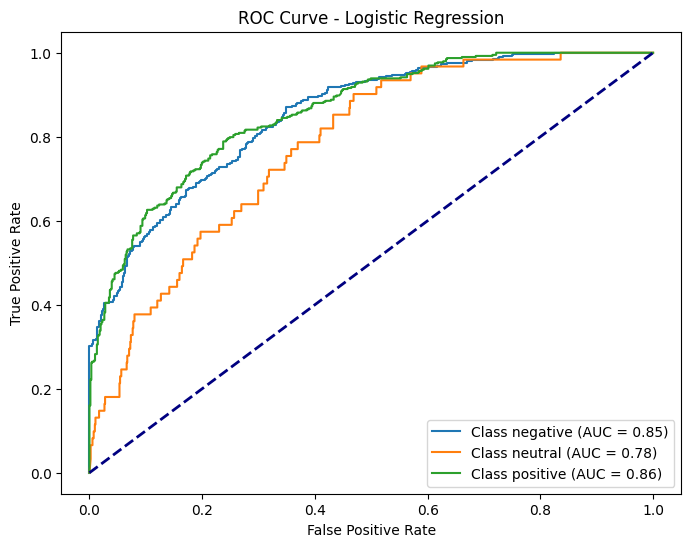


Classification Report - Logistic Regression:
              precision    recall  f1-score   support

    positive       0.76      0.84      0.80       546
    negative       0.50      0.03      0.06        61
     neutral       0.72      0.72      0.72       393

    accuracy                           0.74      1000
   macro avg       0.66      0.53      0.52      1000
weighted avg       0.73      0.74      0.72      1000



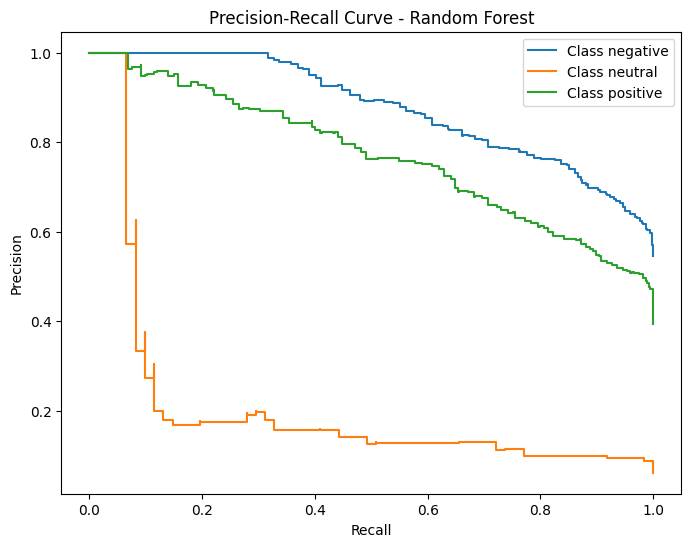

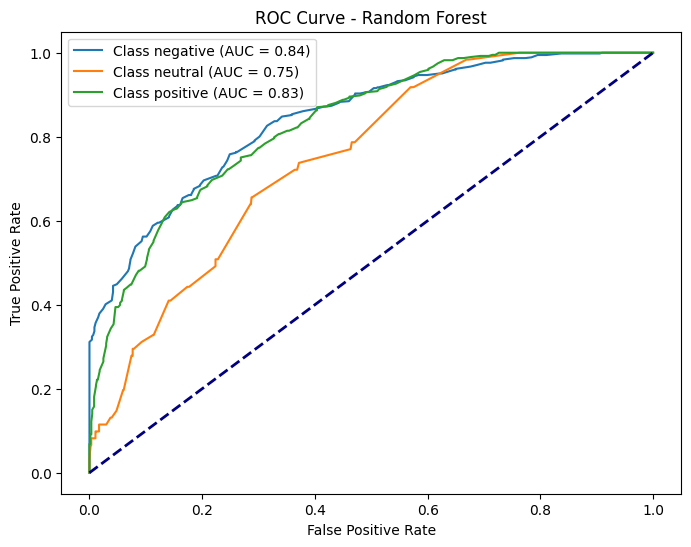


Classification Report - Random Forest:
              precision    recall  f1-score   support

    positive       0.75      0.82      0.79       546
    negative       0.67      0.07      0.12        61
     neutral       0.69      0.69      0.69       393

    accuracy                           0.73      1000
   macro avg       0.70      0.53      0.53      1000
weighted avg       0.72      0.73      0.71      1000



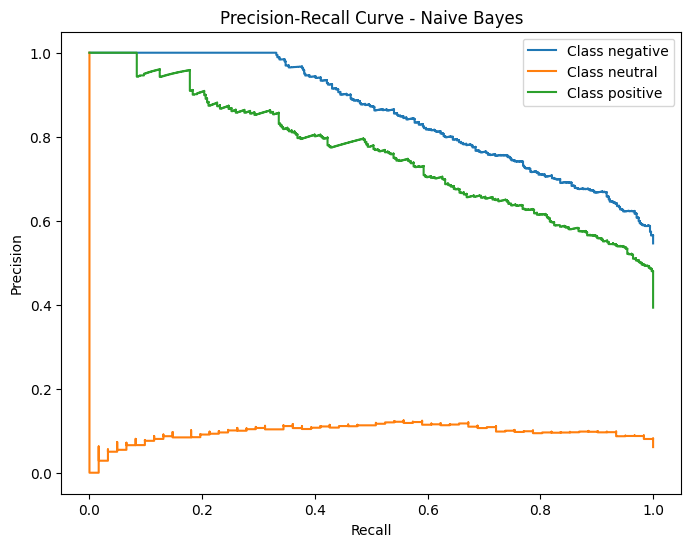

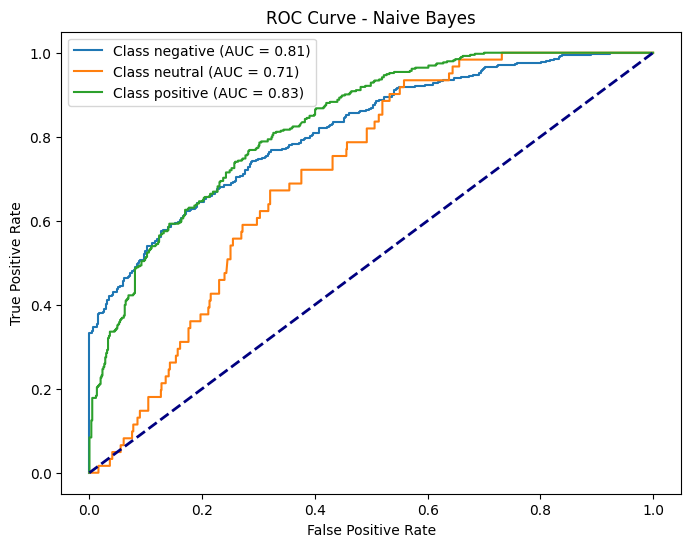


Classification Report - Naive Bayes:
              precision    recall  f1-score   support

    positive       0.75      0.75      0.75       546
    negative       0.00      0.00      0.00        61
     neutral       0.64      0.75      0.69       393

    accuracy                           0.70      1000
   macro avg       0.47      0.50      0.48      1000
weighted avg       0.66      0.70      0.68      1000



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, precision_recall_curve, roc_curve, auc
import matplotlib.pyplot as plt

# Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')

# Load your Twitter sentiment dataset
# Replace 'your_dataset.csv' with the actual file path of your dataset
file_path = '/content/drive/MyDrive/Colab Notebooks/PeterObi Politics.csv'
df = pd.read_csv(file_path)

# Assuming your dataset has 'text' column for tweets and 'sentiment' column for labels
X = df['clean_tweet']
y = df['sentiment']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Vectorize the text data
vectorizer = TfidfVectorizer()
X_train_vec = vectorizer.fit_transform(X_train)
X_test_vec = vectorizer.transform(X_test)

# Define machine learning models
models = {
    'Logistic Regression': LogisticRegression(),
    'Random Forest': RandomForestClassifier(),
    'Naive Bayes': MultinomialNB()
}

# Plot precision-recall curve and ROC curve for each class
for model_name, model in models.items():
    # Train the model
    model.fit(X_train_vec, y_train)

    # Predict sentiments
    y_pred_prob = model.predict_proba(X_test_vec)

    # Plot precision-recall curve for each class
    plt.figure(figsize=(8, 6))
    for i in range(len(model.classes_)):
        precision, recall, _ = precision_recall_curve(y_test.apply(lambda x: x == model.classes_[i]), y_pred_prob[:, i])
        plt.step(recall, precision, label=f'Class {model.classes_[i]}')

    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.title(f'Precision-Recall Curve - {model_name}')
    plt.legend()
    plt.show()

    # Plot ROC curve for each class
    plt.figure(figsize=(8, 6))
    for i in range(len(model.classes_)):
        fpr, tpr, _ = roc_curve(y_test.apply(lambda x: x == model.classes_[i]), y_pred_prob[:, i])
        roc_auc = auc(fpr, tpr)
        plt.plot(fpr, tpr, label=f'Class {model.classes_[i]} (AUC = {roc_auc:.2f})')

    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'ROC Curve - {model_name}')
    plt.legend()
    plt.show()

    # Evaluate F-scores for each class
    f_score = classification_report(y_test, model.predict(X_test_vec), target_names=df['sentiment'].unique())
    print(f'\nClassification Report - {model_name}:\n{f_score}')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


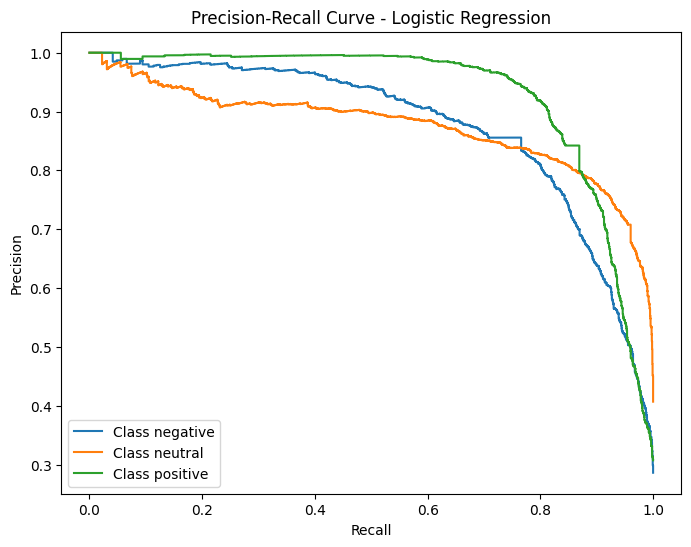

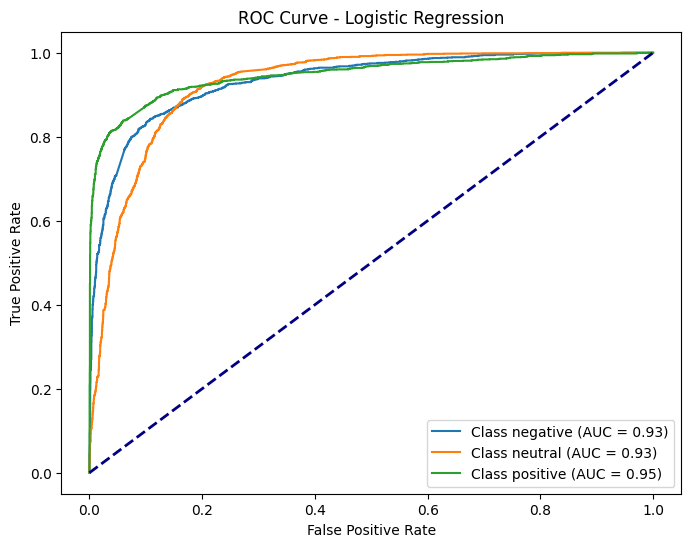


Classification Report - Logistic Regression:
              precision    recall  f1-score   support

     neutral       0.81      0.78      0.80      1572
    negative       0.79      0.88      0.83      2236
    positive       0.91      0.80      0.85      1688

    accuracy                           0.83      5496
   macro avg       0.84      0.82      0.83      5496
weighted avg       0.84      0.83      0.83      5496



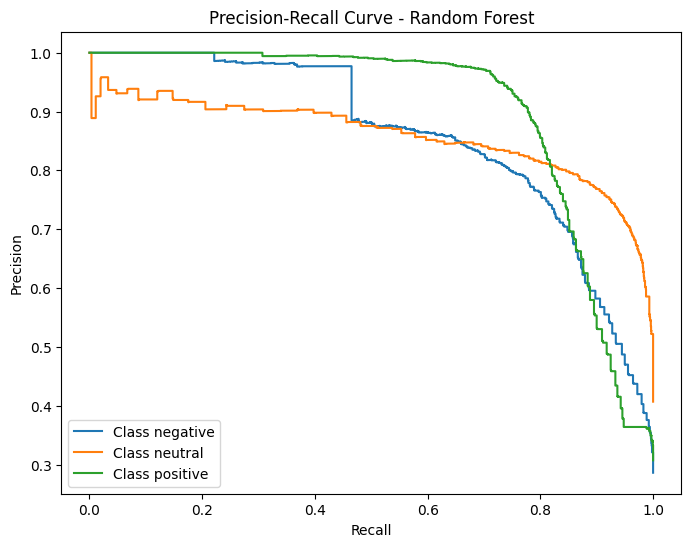

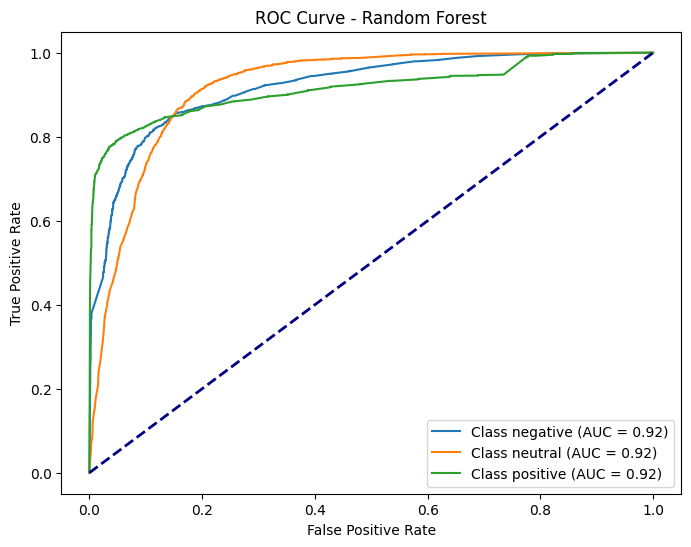


Classification Report - Random Forest:
              precision    recall  f1-score   support

     neutral       0.79      0.76      0.78      1572
    negative       0.77      0.90      0.83      2236
    positive       0.92      0.76      0.83      1688

    accuracy                           0.82      5496
   macro avg       0.83      0.81      0.81      5496
weighted avg       0.82      0.82      0.82      5496



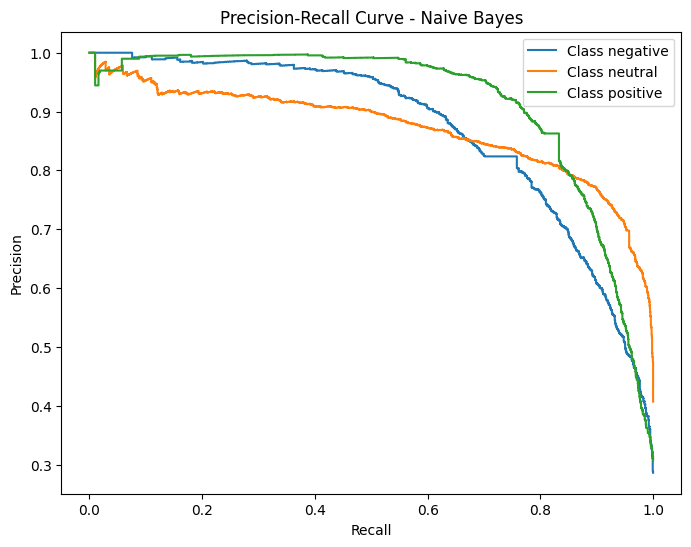

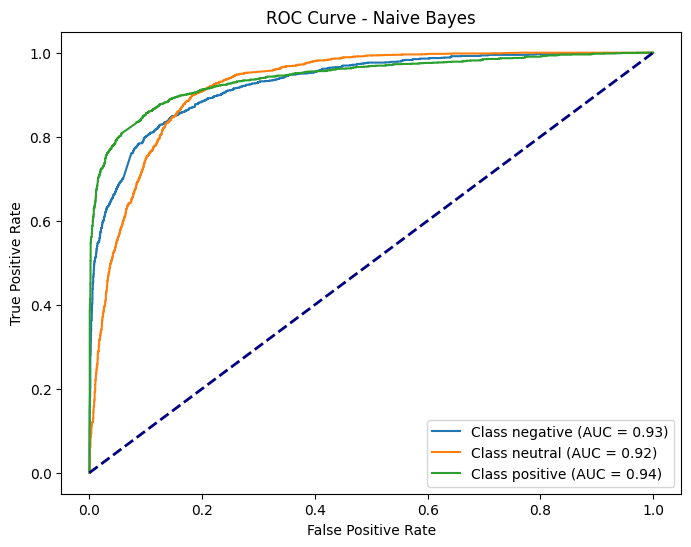


Classification Report - Naive Bayes:
              precision    recall  f1-score   support

     neutral       0.92      0.58      0.71      1572
    negative       0.68      0.96      0.79      2236
    positive       0.92      0.73      0.81      1688

    accuracy                           0.78      5496
   macro avg       0.84      0.76      0.77      5496
weighted avg       0.82      0.78      0.78      5496



In [ ]:

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, precision_recall_curve, roc_curve, auc
import matplotlib.pyplot as plt

# Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')

# Load your Twitter sentiment dataset
# Replace 'your_dataset.csv' with the actual file path of your dataset
file_path = '/content/drive/MyDrive/Colab Notebooks/Tweets.csv'
df = pd.read_csv(file_path)

# Drop rows with missing values in 'selected_text' and 'sentiment' columns
df = df.dropna(subset=['selected_text', 'sentiment'])

# Assuming your dataset has 'text' column for tweets and 'sentiment' column for labels
X = df['selected_text']
y = df['sentiment']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Vectorize the text data
vectorizer = TfidfVectorizer()
X_train_vec = vectorizer.fit_transform(X_train.astype('U'))  # Convert to Unicode
X_test_vec = vectorizer.transform(X_test.astype('U'))

# Define machine learning models
models = {
    'Logistic Regression': LogisticRegression(),
    'Random Forest': RandomForestClassifier(),
    'Naive Bayes': MultinomialNB()
}

# Plot precision-recall curve and ROC curve for each class
for model_name, model in models.items():
    # Train the model
    model.fit(X_train_vec, y_train)

    # Predict sentiments
    y_pred_prob = model.predict_proba(X_test_vec)

    # Plot precision-recall curve for each class
    plt.figure(figsize=(8, 6))
    for i in range(len(model.classes_)):
        precision, recall, _ = precision_recall_curve(y_test.apply(lambda x: x == model.classes_[i]), y_pred_prob[:, i])
        plt.step(recall, precision, label=f'Class {model.classes_[i]}')

    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.title(f'Precision-Recall Curve - {model_name}')
    plt.legend()
    plt.show()

    # Plot ROC curve for each class
    plt.figure(figsize=(8, 6))
    for i in range(len(model.classes_)):
        fpr, tpr, _ = roc_curve(y_test.apply(lambda x: x == model.classes_[i]), y_pred_prob[:, i])
        roc_auc = auc(fpr, tpr)
        plt.plot(fpr, tpr, label=f'Class {model.classes_[i]} (AUC = {roc_auc:.2f})')

    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'ROC Curve - {model_name}')
    plt.legend()
    plt.show()

    # Evaluate F-scores for each class
    f_score = classification_report(y_test, model.predict(X_test_vec), target_names=df['sentiment'].unique())
    print(f'\nClassification Report - {model_name}:\n{f_score}')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
       duration  protocol_type  service  flag  src_bytes  dst_bytes  land  \
0             0              1       45     1          0          0     0   
1             0              1       45     1          0          0     0   
2             2              1       19     9      12983          0     0   
3             0              0       13     9         20          0     0   
4             1              1       55     2          0         15     0   
...         ...            ...      ...   ...        ...        ...   ...   
22539         0              1       49     9        794        333     0   
22540         0              1       22     9        317        938     0   
22541         0              1       22     9      54540       8314     0   
22542         0              2       11     9         42         42     0   
22543         0         

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classif

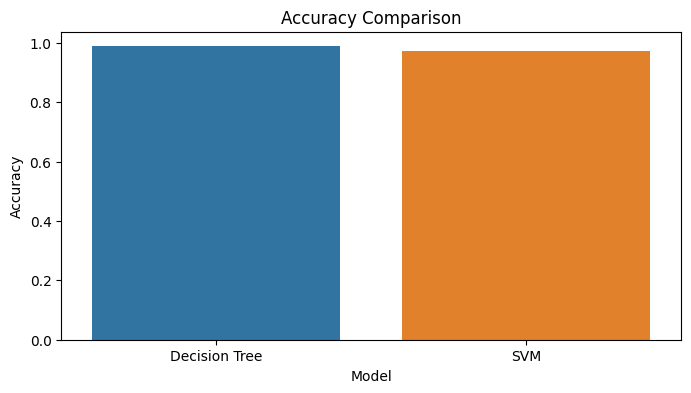

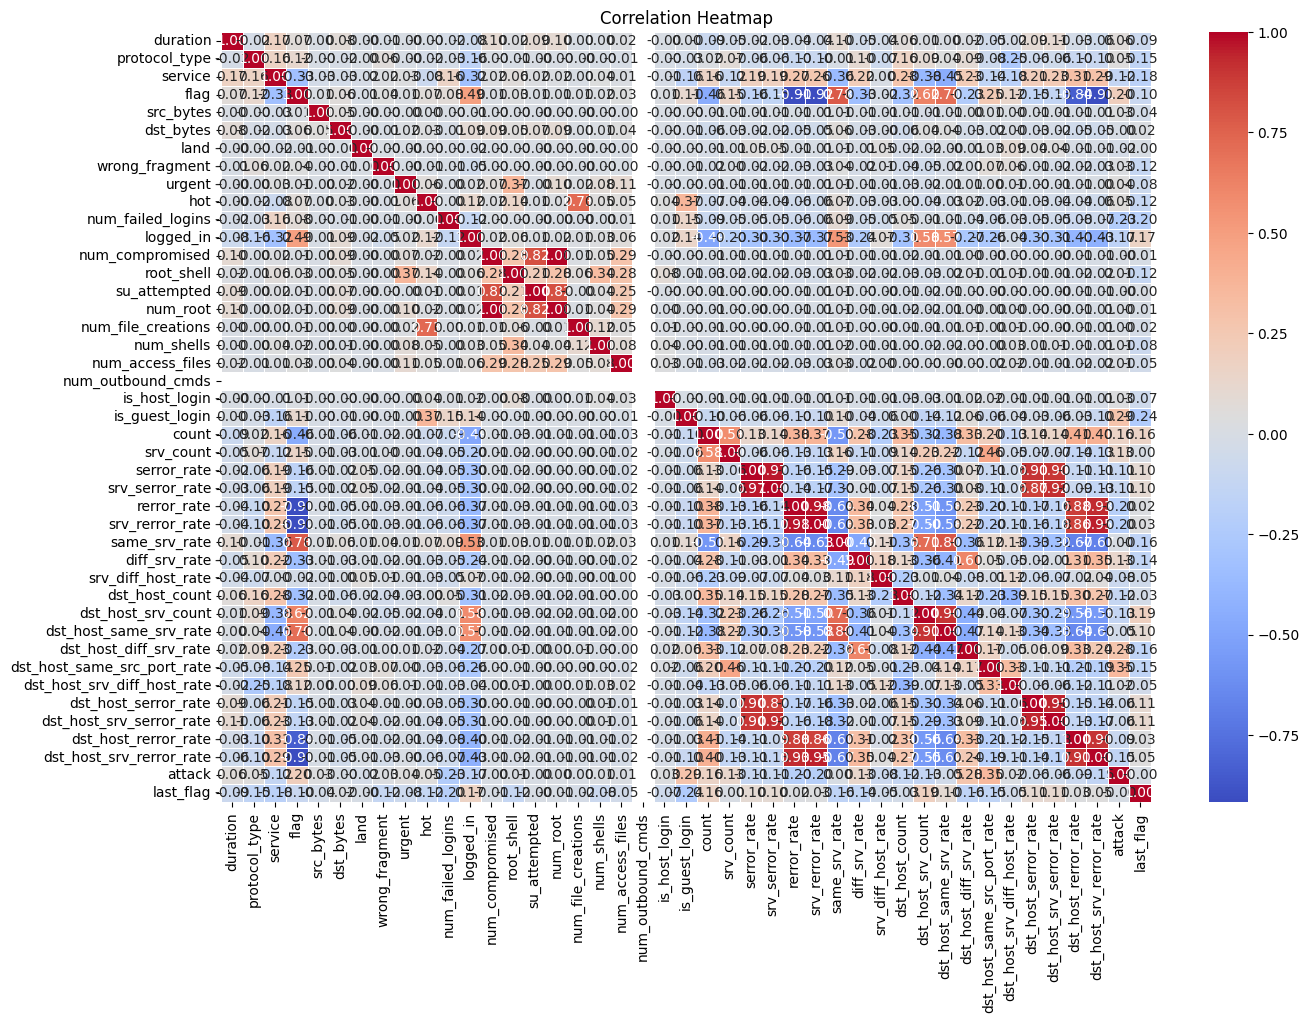

Decision Tree:
Accuracy: 0.9875803947660236
F-score: 0.9870810022500911
Classification Report:
               precision    recall  f1-score   support

          14       1.00      1.00      1.00       924
          16       0.99      1.00      1.00      1925
          24       0.84      0.92      0.88        62
          11       0.99      0.99      0.99       189
           4       0.99      1.00      0.99       249
          27       1.00      0.99      1.00       147
           0       1.00      1.00      1.00       143
          25       0.95      0.90      0.93       154
           2       0.50      1.00      0.67         2
           1       0.98      1.00      0.99        65
          33       0.98      1.00      0.99       209
          28       1.00      1.00      1.00        38
          21       1.00      0.99      1.00       131
          19       1.00      0.78      0.88         9
           5       0.92      0.92      0.92        24
          15       1.00      0.93      

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.

In [6]:

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, f1_score
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import drive

# Mount Google Drive
drive.mount('/content/drive')

# Load your dataset
file_path = '/content/drive/MyDrive/Colab Notebooks/Test.txt'
df = pd.read_csv(file_path, sep=",", names=["duration", "protocol_type", "service", "flag", "src_bytes", "dst_bytes",
                                            "land", "wrong_fragment", "urgent", "hot", "num_failed_logins",
                                            "logged_in", "num_compromised", "root_shell", "su_attempted",
                                            "num_root", "num_file_creations", "num_shells", "num_access_files",
                                            "num_outbound_cmds", "is_host_login", "is_guest_login", "count",
                                            "srv_count", "serror_rate", "srv_serror_rate", "rerror_rate",
                                            "srv_rerror_rate", "same_srv_rate", "diff_srv_rate",
                                            "srv_diff_host_rate", "dst_host_count", "dst_host_srv_count",
                                            "dst_host_same_srv_rate", "dst_host_diff_srv_rate",
                                            "dst_host_same_src_port_rate", "dst_host_srv_diff_host_rate",
                                            "dst_host_serror_rate", "dst_host_srv_serror_rate", "dst_host_rerror_rate",
                                            "dst_host_srv_rerror_rate", "attack", "last_flag"])

# Encode categorical features
le = LabelEncoder()
for column in df.columns:
    if df[column].dtype == 'object':
        df[column] = le.fit_transform(df[column])

# Separate features and labels
X = df.drop("attack", axis=1)
y = df["attack"]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize features for SVM
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Decision Tree
dt_classifier = DecisionTreeClassifier(random_state=42)
dt_classifier.fit(X_train, y_train)
dt_predictions = dt_classifier.predict(X_test)
dt_fscore = f1_score(y_test, dt_predictions, average='weighted')

# SVM
svm_classifier = SVC(kernel='rbf', random_state=42)  # Change kernel to 'rbf'
svm_classifier.fit(X_train_scaled, y_train)
svm_predictions = svm_classifier.predict(X_test_scaled)
svm_fscore = f1_score(y_test, svm_predictions, average='weighted')
print(df)
# Evaluate models
print("Decision Tree:")
print("Accuracy:", accuracy_score(y_test, dt_predictions))
print("F-score:", dt_fscore)
print("Classification Report:\n", classification_report(y_test, dt_predictions))

print("\nSVM:")
print("Accuracy:", accuracy_score(y_test, svm_predictions))
print("F-score:", svm_fscore)
print("Classification Report:\n", classification_report(y_test, svm_predictions))

# Plot Bar Graph
accuracy_df = pd.DataFrame({'Model': ['Decision Tree', 'SVM'],
                            'Accuracy': [accuracy_score(y_test, dt_predictions), accuracy_score(y_test, svm_predictions)]})

plt.figure(figsize=(8, 4))
sns.barplot(x='Model', y='Accuracy', data=accuracy_df)
plt.title('Accuracy Comparison')
plt.show()

# Encode categorical features again if needed
le = LabelEncoder()
for column in df.columns:
    if df[column].dtype == 'object':
        df[column] = le.fit_transform(df[column])

# Compute the correlation matrix
corr_matrix = df.corr()

# Create a heatmap
plt.figure(figsize=(15, 10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Heatmap')
plt.show()

# ...

# Evaluate models
print("Decision Tree:")
print("Accuracy:", accuracy_score(y_test, dt_predictions))
print("F-score:", dt_fscore)

# Get the unique class names from your dataframe
class_names_dt = df['attack'].unique()

# Specify the labels parameter with unique class names
print("Classification Report:\n", classification_report(y_test, dt_predictions, labels=class_names_dt))

# ...

In [4]:
class_14_instances = df[df['attack'] == 14]
print(class_14_instances.head())

    duration  protocol_type  service  flag  src_bytes  dst_bytes  land  \
0          0              1       45     1          0          0     0   
1          0              1       45     1          0          0     0   
12         0              1       45     1          0          0     0   
13         0              1       55     5          0          0     0   
19         0              1       45     1          0          0     0   

    wrong_fragment  urgent  hot  ...  dst_host_same_srv_rate  \
0                0       0    0  ...                    0.04   
1                0       0    0  ...                    0.00   
12               0       0    0  ...                    0.01   
13               0       0    0  ...                    0.73   
19               0       0    0  ...                    0.07   

    dst_host_diff_srv_rate  dst_host_same_src_port_rate  \
0                     0.06                          0.0   
1                     0.06                          

In [ ]:

from google.colab import drive
import pandas as pd

# Mount Google Drive
drive.mount('/content/drive')

# Load Dataset
file_path = '/content/drive/MyDrive/Colab Notebooks/KPMG_VI_New_raw_data_update_final.xlsx'
df = pd.read_excel(file_path)
df.head()
# Check for Missing Values
missing_values = df.isnull().sum()
print("Missing Values:\n", missing_values)

# Check Data Types
data_types = df.dtypes
print("Data Types:\n", data_types)

# Check for Duplicate Rows
duplicate_rows = df[df.duplicated()]
print("Duplicate Rows:\n", duplicate_rows)

# Check for Data Fields with Values
fields_with_values = df.count()
print("Fields with Values:\n", fields_with_values)

# Check for Contradictions (You may need to define specific rules based on your dataset)

# Check for Up-to-Date Values (You may need a timestamp or date field for this)

# Check for Data Items with Value Metadata (You may need additional metadata columns)

# Check for Allowable Values (Define the allowable values for each field)

# Print Summary Statistics
summary_stats = df.describe()
print("Summary Statistics:\n", summary_stats)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Missing Values:
 Unnamed: 0                                                                                                                                                                       98
Note: The data and information in this document is reflective of a hypothetical situation and client. This document is to be used for KPMG Virtual Internship purposes only.     98
Unnamed: 2                                                                                                                                                                       79
Unnamed: 3                                                                                                                                                                       98
Unnamed: 4                                                                                                                            

Mounted at /content/drive
Original Dataset:
                        date  \
0  2023-04-10 17:03:10+00:00   
1  2023-04-10 17:03:07+00:00   
2  2023-04-10 17:03:05+00:00   
3  2023-04-10 17:01:44+00:00   
4  2023-04-10 17:00:11+00:00   

                                               tweet    username  \
0  Watching Eniola Badmus' role in Gangs of Lagos...     IamLait   
1  @_uchayyyy_ She did not even have to be in Gan...    thefvnta   
2  Awwwwwwwwwn. I got "Ify, the Collector-Protect...  Preshy_ous   
3  A big thank you to @jadeosiberu and all the ca...    Moyo_VIP   
4                            @forlah_ Gangs of Lagos   sixcenti1   

   verification            displayname  \
0         False  'Laitan François jnr.   
1         False           Mr ican doit   
2         False              Nwa Nnu 💜   
3         False          Moyò of Lagos   
4         False                shaheed   

                                         description  \
0  Freelance Radio Journalist (@topradio909),

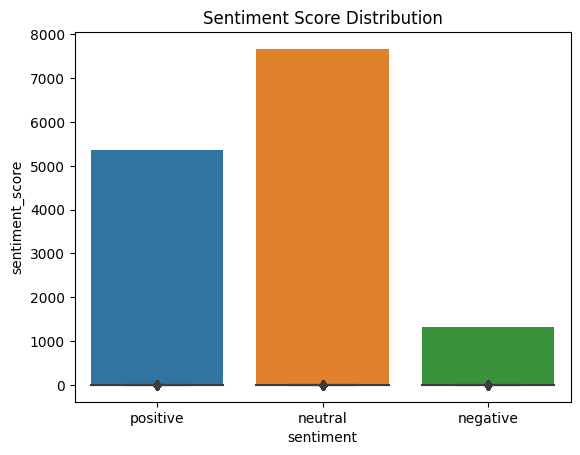

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(



Classification Report - Logistic Regression:
              precision    recall  f1-score   support

    negative       0.81      0.20      0.33       303
     neutral       0.78      0.94      0.85      1543
    positive       0.88      0.81      0.84      1028

    accuracy                           0.81      2874
   macro avg       0.82      0.65      0.67      2874
weighted avg       0.82      0.81      0.79      2874



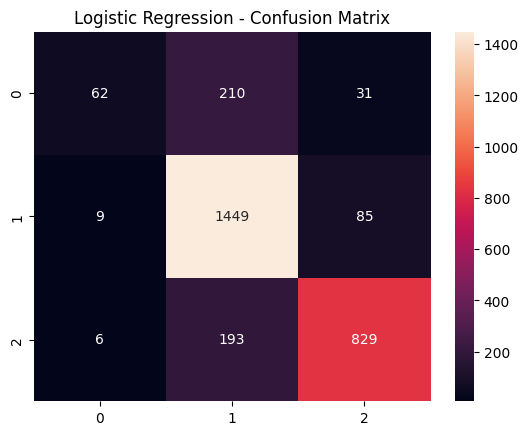


Classification Report - Random Forest:
              precision    recall  f1-score   support

    negative       0.96      0.17      0.29       303
     neutral       0.77      0.93      0.84      1543
    positive       0.84      0.79      0.81      1028

    accuracy                           0.80      2874
   macro avg       0.86      0.63      0.65      2874
weighted avg       0.82      0.80      0.78      2874



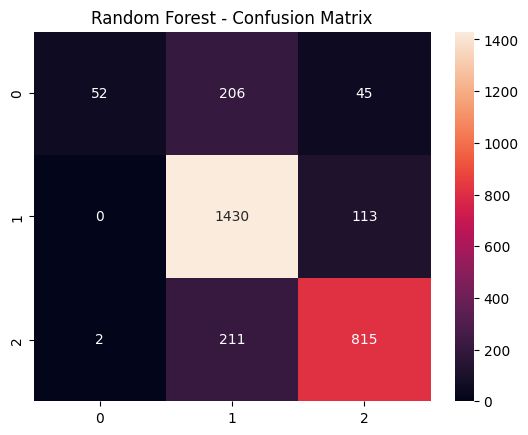


Classification Report - Naive Bayes:
              precision    recall  f1-score   support

    negative       1.00      0.01      0.02       303
     neutral       0.72      0.92      0.81      1543
    positive       0.82      0.71      0.76      1028

    accuracy                           0.75      2874
   macro avg       0.85      0.55      0.53      2874
weighted avg       0.79      0.75      0.71      2874



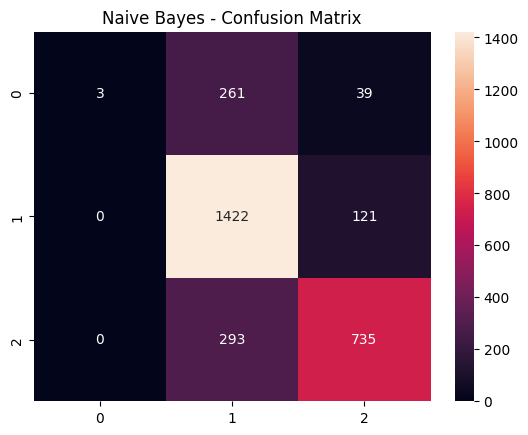

In [ ]:

import pandas as pd
import re
import matplotlib.pyplot as plt
import seaborn as sns
from textblob import TextBlob
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, confusion_matrix

# Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')

# Load your Twitter dataset (replace 'your_dataset.csv' with your file path)
file_path = '/content/drive/MyDrive/Colab Notebooks/Gangs_of_Lagos.csv'
df = pd.read_csv(file_path)

# Display the first few rows of the dataset
print("Original Dataset:")
print(df.head())

# Clean up the text data
def clean_text(tweet):
  """Cleans the given tweet text."""
  # Remove usernames
  tweet = re.sub(r'@[A-Za-z0-9]+', '', tweet)
  # Remove links
  tweet = re.sub('https?://[A-Za-z0-9./]+', '', tweet)
  # Keep only letters
  tweet = re.sub('[^a-zA-Z]', ' ', tweet)
  # Convert to lowercase
  tweet = tweet.lower()
  return tweet

# Apply the clean_text function to the 'tweet' column
df['cleaned_text'] = df['tweet'].apply(clean_text)

# Perform sentiment analysis using TextBlob
def get_sentiment(tweet):
  """Returns the sentiment polarity of the given tweet text."""
  analysis = TextBlob(tweet)
  return analysis.sentiment.polarity

# Apply the get_sentiment function to the 'cleaned_text' column
df['sentiment_score'] = df['cleaned_text'].apply(get_sentiment)

# Categorize sentiments
def categorize_sentiment(sentiment_score):
  """Categorizes the given sentiment score into negative, neutral, or positive."""
  if sentiment_score < -0.1:
    return 'negative'
  elif sentiment_score > 0.1:
    return 'positive'
  else:
    return 'neutral'

# Apply the categorize_sentiment function to the 'sentiment_score' column
df['sentiment'] = df['sentiment_score'].apply(categorize_sentiment)

# Display the cleaned dataset with sentiment analysis results
print("\nCleaned Dataset with Sentiment Analysis:")
print(df[['tweet', 'cleaned_text', 'sentiment']].head())

# Create visualizations
sns.countplot(x='sentiment', data=df)
plt.title('Sentiment Distribution')

sns.boxplot(x='sentiment', y='sentiment_score', data=df)
plt.title('Sentiment Score Distribution')
plt.show()

# Split the dataset into training and testing sets
X = df['cleaned_text']
y = df['sentiment']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Vectorize the text data
vectorizer = TfidfVectorizer()

X_train_vec = vectorizer.fit_transform(X_train)
X_test_vec = vectorizer.transform(X_test)

# Define machine learning models
models = {
    'Logistic Regression': LogisticRegression(),
    'Random Forest': RandomForestClassifier(),
    'Naive Bayes': MultinomialNB(),
}

# Train and evaluate each model
for model_name, model in models.items():
  # Train the model
  model.fit(X_train_vec, y_train)

  # Predict sentiments
  y_pred = model.predict(X_test_vec)

  # Evaluate the model
  print(f"\nClassification Report - {model_name}:\n{classification_report(y_test, y_pred)}")

  # Create confusion matrix
  cm = confusion_matrix(y_test, y_pred)

  sns.heatmap(data=cm, annot=True, fmt="d")
  plt.title(f"{model_name} - Confusion Matrix")
  plt.show()